In [7]:
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import os

import matplotlib.mlab as mlab
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
export_df = pd.read_csv(r"C:\Users\MY PC\OneDrive\Desktop\Datasets\psd_coffee.csv")

In [9]:
export_df.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,711100,"Coffee, Green",AG,Algeria,2003,2012,6,29,Arabica Production,2,(1000 60 KG BAGS),0.0
1,711100,"Coffee, Green",AG,Algeria,2003,2012,6,90,Bean Exports,2,(1000 60 KG BAGS),0.0
2,711100,"Coffee, Green",AG,Algeria,2003,2012,6,58,Bean Imports,2,(1000 60 KG BAGS),1800.0
3,711100,"Coffee, Green",AG,Algeria,2003,2012,6,20,Beginning Stocks,2,(1000 60 KG BAGS),0.0
4,711100,"Coffee, Green",AG,Algeria,2003,2012,6,125,Domestic Consumption,2,(1000 60 KG BAGS),1805.0


In [10]:
export_df=export_df[export_df.Country_Name=='India']

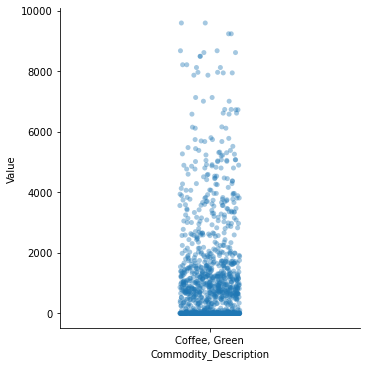

In [11]:
sns.catplot(data=export_df,x='Commodity_Description',y='Value',alpha=0.4)

Text(0.5, 1.0, 'Coffee Attributes for 1000 60kg bags')

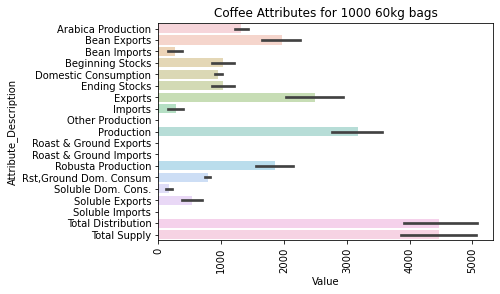

In [12]:
sns.barplot(data=export_df,y='Attribute_Description',x='Value',alpha=0.4,orient='h')
plt.xticks(rotation='90')
plt.title("Coffee Attributes for 1000 60kg bags")

In [13]:
tea_data = pd.read_csv(r"C:\Users\MY PC\OneDrive\Desktop\Datasets\Tea in South India Production.csv")

In [14]:
tea_data.head(15)

,Sl. No.,District,AREA,PRODN.,PTY.
0,1,Ariyalur,NaN,NaN,NaN
1,2,Coimbatore,11186.0,150340.0,13.00
2,3,Cuddalore,NaN,NaN,NaN
3,4,Dharmapuri,NaN,NaN,NaN
4,5,Dindigul,3.0,40.0,13.44
5,6,Erode,NaN,NaN,NaN
6,7,Kancheepuram,NaN,NaN,NaN
7,8,Kanyakumari,202.0,2715.0,13.44
8,9,Karur,NaN,NaN,NaN
9,10,Krishnagiri,NaN,NaN,NaN


In [15]:
tea_data.isnull().mean()

Sl. No.     0.00000
District    0.00000
AREA        0.78125
PRODN.      0.78125
PTY.        0.78125
dtype: float64

In [16]:
tea_data.dropna(axis = 0, inplace = True, how = 'all')

In [17]:
tea_data['AREA'].fillna(tea_data['AREA'].median(), inplace=True)
tea_data['PRODN.'].fillna(tea_data['PRODN.'].median(), inplace=True)
tea_data['PTY.'].fillna(tea_data['PTY.'].median(), inplace=True)

In [18]:
tea_data.head()

,Sl. No.,District,AREA,PRODN.,PTY.
0,1,Ariyalur,1676.0,22525.0,13.44
1,2,Coimbatore,11186.0,150340.0,13.00
2,3,Cuddalore,1676.0,22525.0,13.44
3,4,Dharmapuri,1676.0,22525.0,13.44
4,5,Dindigul,3.0,40.0,13.44


Text(0.5, 1.0, 'Tea Market Information of Tamil Nadu:Area,Production,Productivity')

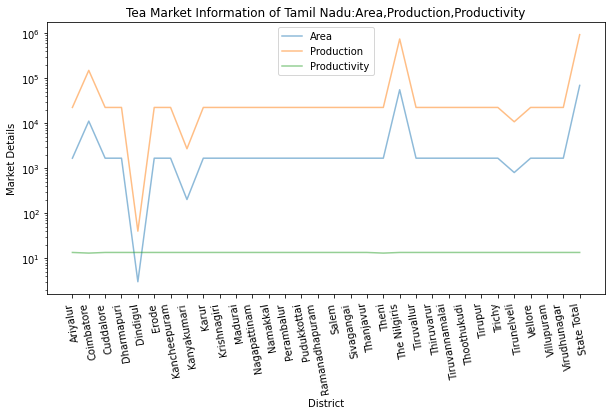

In [19]:
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(data=tea_data,x='District',y='AREA',markers=True,ax=ax,alpha=0.5,label='Area')
sns.lineplot(data=tea_data,x='District',y='PRODN.',markers=True,ax=ax,alpha=0.5,label='Production')
sns.lineplot(data=tea_data,x='District',y='PTY.',markers=True,ax=ax,alpha=0.5,label='Productivity')

plt.yscale("log")
plt.ylabel("Market Details")
plt.xticks(rotation='100')
plt.title("Tea Market Information of Tamil Nadu:Area,Production,Productivity")

In [21]:
tea_production = pd.read_excel(r'C:\Users\MY PC\OneDrive\Desktop\Datasets\Tea Production.xlsx')

In [32]:
tea_production.head(10)

,Year,Tea Production In Tamil Nadu,Tea Production In Kerala,Tea Production In Karnataka,Tea Production In South India,Tea Production In India
0,2001,131.83,65.85,5.44,203.12,853.7
1,2002,141.84,59.18,5.71,206.73,838.5
2,2003,166.57,58.01,5.27,229.85,878.1
3,2004,163.02,62.15,5.62,230.78,893.0
4,2005,154.60,67.03,5.38,227.01,946.0
5,2006,152.27,68.76,5.26,226.29,955.9
6,2007,153.13,61.83,5.03,220.00,944.7
7,2008,170.53,70.29,6.08,246.90,980.0
8,2009,169.36,68.96,5.81,244.13,979.0
9,2010,170.72,66.75,5.90,243.37,966.4


<AxesSubplot:ylabel='Year'>

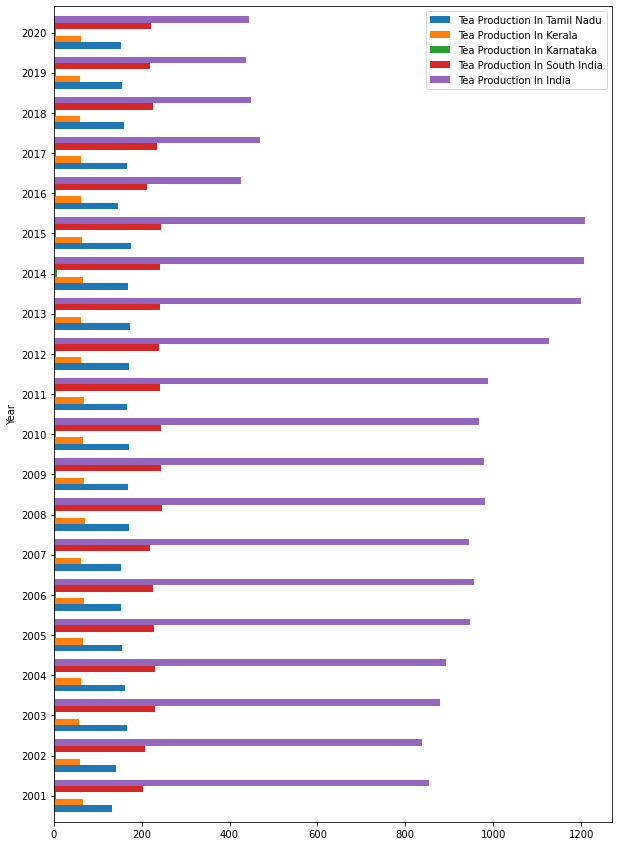

In [61]:
tea_production.set_index('Year').plot(kind='barh',figsize=(10,15),width=0.8)

In [40]:
from sklearn.cluster import KMeans
labels = KMeans(n_clusters=4,random_state=100).fit_predict(tea_production)

In [45]:
def cluster_among_variables(x,y,labels):
    
    columns = list(x.columns)
    
    r = int(len(columns)/2)
    if r%2==0:
        r = r
    else:
        r = r+1
        
    f,ax=plt.subplots(r,2,figsize=(15,10))
    a=0
    
    for col in range(0,r):
        for j in range(0,2):
            if a != len(columns):
                ax[col][j].scatter(x[y],x[columns[a]],c=labels)
                ax[col][j].set_xlabel(y)
                ax[col][j].set_ylabel(columns[a])
                a = a+1

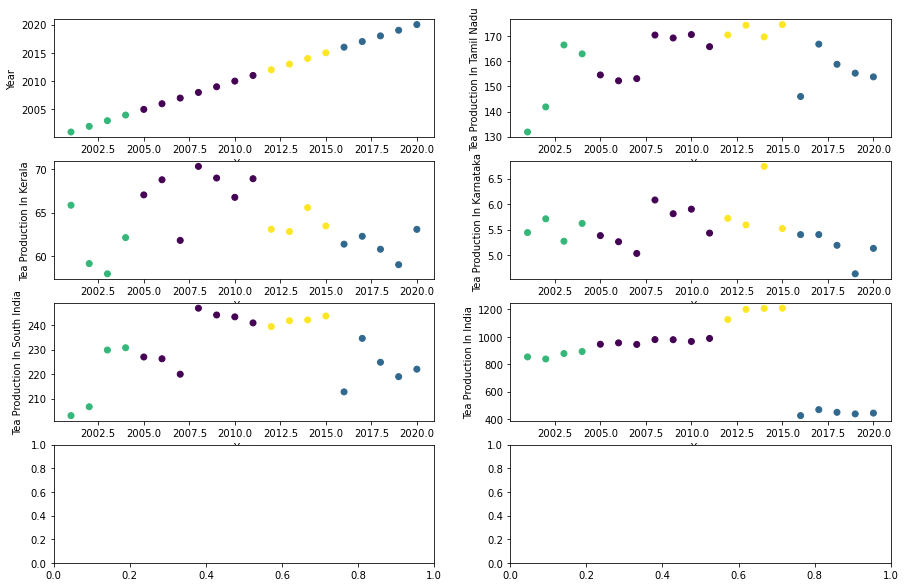

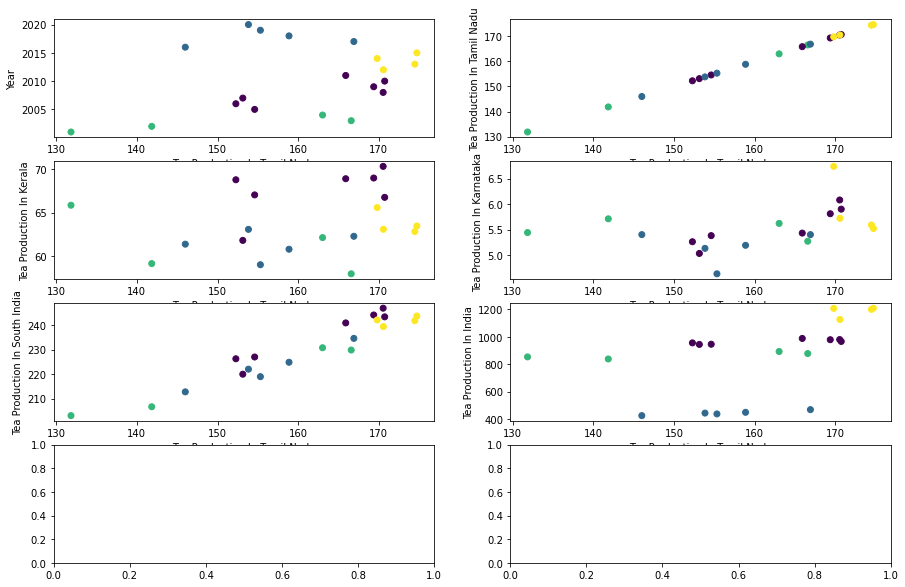

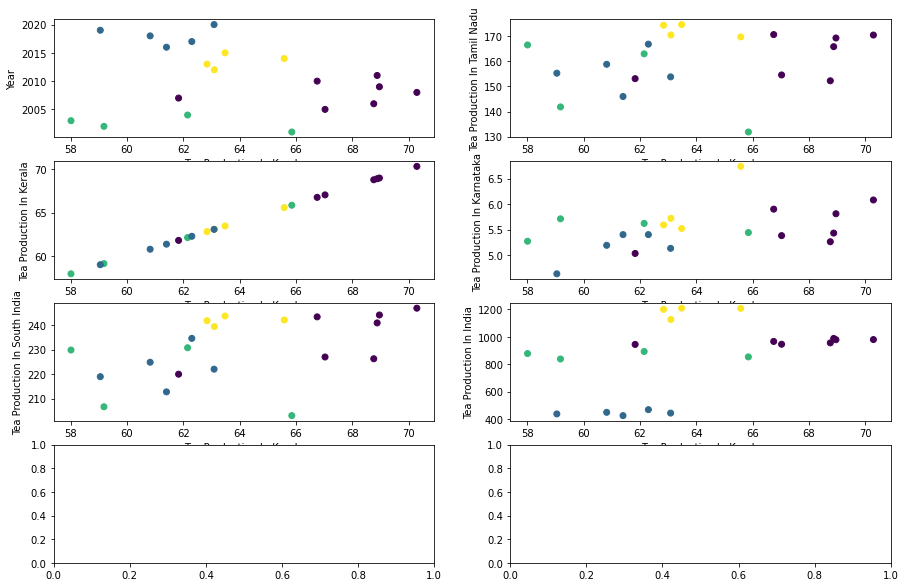

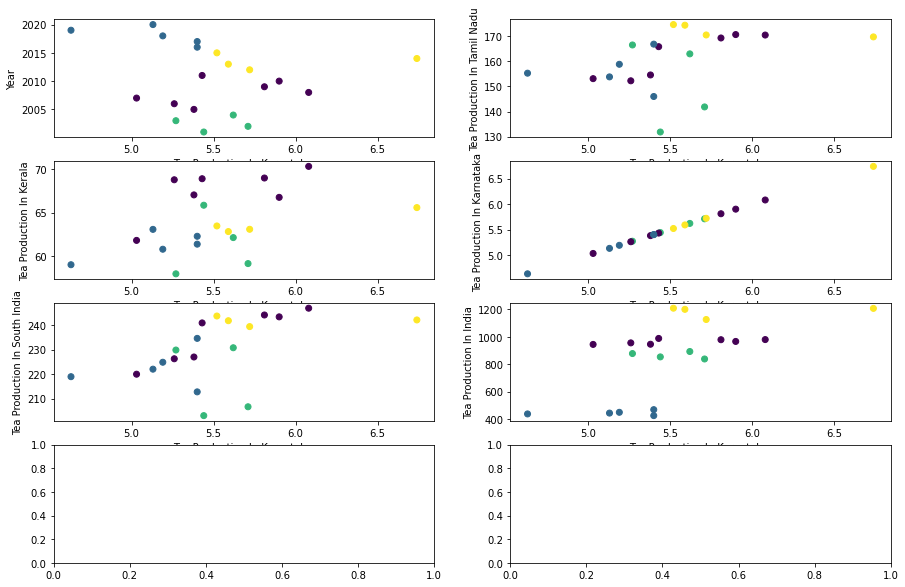

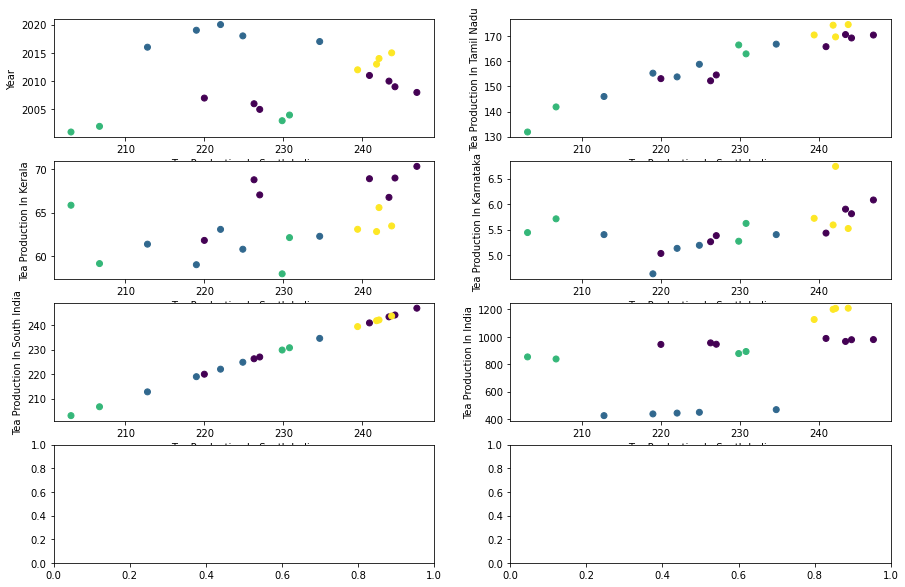

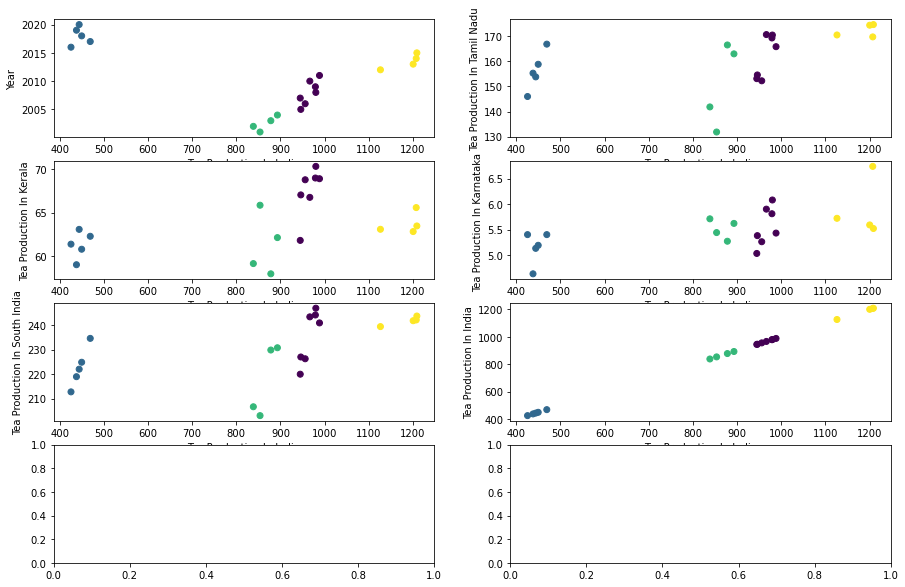

In [46]:
for col in tea_production.columns:
    cluster_among_variables(tea_production,col,labels)